# Question 2

## 2a

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
Q = 0.99
alpha = 0.4709
beta = 1.0
H = 1.0
b_B = 1.178164343

#Number of Grid Points
n = 10000

#Grid Points
delz = H/(n-1)

#Stores the solutions 
b = np.zeros(n)

for i in range(n-1):
    b[0] = b_B
    b[i+1] = b[i] + delz*(alpha/beta-Q/(b[i]**3))



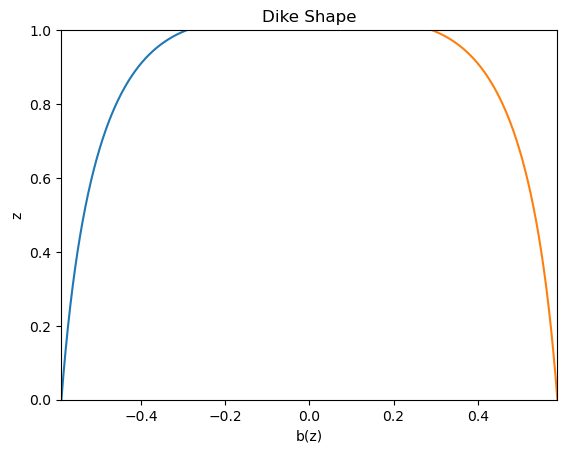

In [23]:
#Plots Dike Shape
z = np.linspace(0,1,n)
plt.plot(-b/2,z)
plt.plot(b/2,z)
plt.xlim(-b_B/2,b_B/2)
plt.ylim(0,H)
plt.xlabel('b(z)')
plt.ylabel('z')

plt.title('Dike Shape')
plt.show()

## 2b

The time step used in this program was based on what was derived in my answer to Q1 e, where I showed that to guarantee stability we need

\begin{align}
\Delta t < \frac{(\Delta z)^2}{3\alpha B_m^2 \Delta Z + 2\beta B_m^3}, \ \text{where} \ B_m = max(B_j^n)\  \forall n,j.
\end{align}
Therefore, to implement we choose a timestep $\Delta t$ such that
\begin{align}
\Delta t = \frac{T}{nt - 1}, \ \text{where}\ T= \text{Final time},\\
nt = math.ceil\left(\frac{T}{\Delta t_{min}}\right) + 1,\\
\Delta t_{min} = \frac{(\Delta z)^2}{3\alpha B_m^2 \Delta Z + 2\beta B_m^3} * 0.1.
\end{align}


Starting simulation for grid size n = 11, nt = 6935, dt = 2.88e-04, dz = 1.00e-01


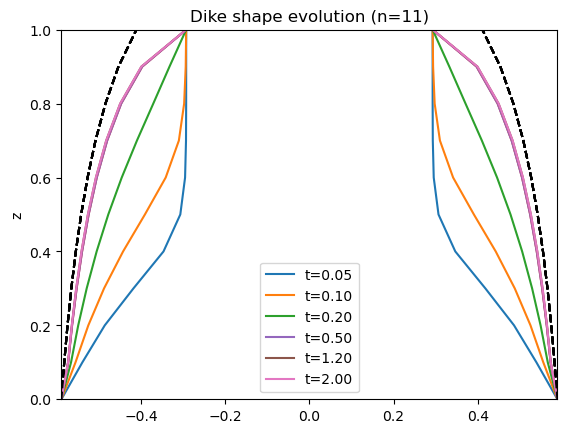


Starting simulation for grid size n = 21, nt = 26952, dt = 7.42e-05, dz = 5.00e-02


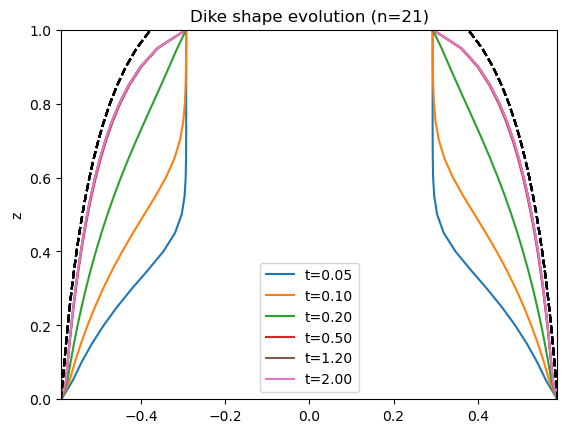


Starting simulation for grid size n = 41, nt = 106234, dt = 1.88e-05, dz = 2.50e-02


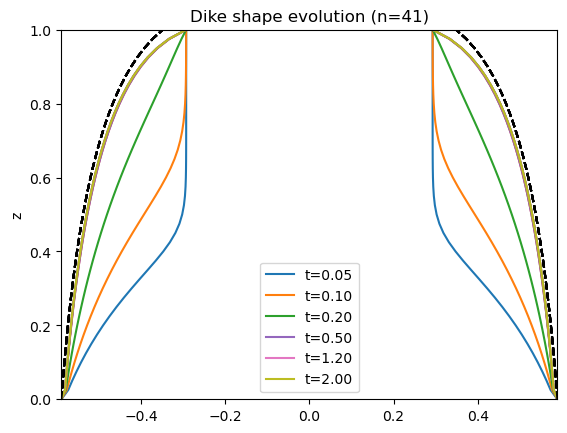

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

#Parameters
Q     =  0.99
alpha = 0.4709
beta  = 1.0
H     = 1.0
b_B   = 1.178164343
b_T   = 0.585373798

timeVals = [0.05, 0.1, 0.2, 0.5, 1.2,2]

ns = [11, 21, 41]


for n in ns:
    
    dz = H / (n - 1)
    z = np.linspace(0, H, n)
    
    dt_min = dz**2 / (3*alpha * b_B**2*dz + 2*beta * b_B**3) * 0.1
    nt = math.ceil(2 / dt_min) + 1

    ts = np.linspace(0, 2, nt)
    dt = ts[-1]/(len(ts)-1)


    b_current = np.ones(n) * b_T
    b_next = np.zeros_like(b_current)
    
    nu = dt / dz
    mu = dt / dz**2

    b_ss = np.zeros(n)


    #Console header
    print("\n" + "="*50)
    print(f"Starting simulation for grid size n = {n}, nt = {nt}, dt = {dt:.2e}, dz = {dz:.2e}")
    print("="*50)
    plt.figure()
    plt.title(f'Dike shape evolution (n={n})')

    #Time Loop
    for ti in ts:

        # apply BCs
        b_current[0]  = b_B
        b_current[-1] = b_T

        b_ss[0] = b_B
        
        #Update Points
        for j in range(n-1):

            #Upwind-Form Convection
            conv = -3*alpha * nu * (b_current[j]**2)*(b_current[j] - b_current[j-1])

            #Adjoint-Form Diffusion
            b_face_p = 0.5*(b_current[j+1] + b_current[j])
            b_face_m = 0.5*(b_current[j] + b_current[j-1])
            
            diff = beta * mu * ((b_face_p**3)*(b_current[j+1]-b_current[j])
                                - (b_face_m**3)*(b_current[j]-b_current[j-1]))
            
            #Update b at next time step
            b_next[j] = b_current[j] + conv + diff

            #Steady State Solution
            b_ss[j+1] = b_ss[j] + dz*(alpha/beta-Q/(b_ss[j]**3))

        #Reapply BCs
        b_next[0]  = b_B
        b_next[-1] = b_T

        #Advance in time
        b_current = b_next

        #Plots at selected times
        if np.isclose(ti, timeVals, atol=dt/2).any():
            plt.plot(b_current/2, z, label=f't={ti:.2f}')
            plt.plot(-b_current/2, z, color=plt.gca().lines[-1].get_color())
            plt.plot(b_ss/2, z, 'k--', label='Steady State' if ti==timeVals[0] else "")
            plt.plot(-b_ss/2, z, 'k--')

    #Removes duplicate labels in legend
    handles, labels = plt.gca().get_legend_handles_labels()
    unique = dict(zip(labels, handles))

    plt.xlim(-b_B/2, b_B/2)
    plt.ylabel('z')
    plt.ylim(0, H)
    plt.legend(unique.values(), unique.keys())
    plt.show(block=True)

## 2c

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

#Parameters
Q     =  0.99
alpha = 0.4709
beta  = 1.0
H     = 1.0
b_B   = 1.178164343
b_T   = 0.585373798

#Number of Grid Points In Space
ns = [11, 21, 31, 41, 51, 61]

dz_values = []
L2_values = []
L_inf_values = []

for i, n in enumerate(ns):
    
    dz = H / (n - 1)
    z = np.linspace(0, H, n)
    
    dt_min = dz**2 / (3*alpha * b_B**2*dz + 2*beta * b_B**3) * 0.1
    nt = math.ceil(2 / dt_min) + 1

    ts = np.linspace(0, 2, nt)
    dt = ts[-1]/(len(ts)-1)


    b_current = np.ones(n) * b_T
    b_next = np.zeros_like(b_current)
    
    nu = dt / dz
    mu = dt / dz**2

    b_ss = np.zeros(n)

    #Time Loop
    for ti in ts:

        # apply BCs
        b_current[0]  = b_B
        b_current[-1] = b_T

        b_ss[0] = b_B
        
        #Update Points
        for j in range(n-1):
            #Upwind-Form Convection
            conv = -3*alpha * nu * (b_current[j]**2)*(b_current[j] - b_current[j-1])

            #Adjoint-Form Diffusion
            b_face_p = 0.5*(b_current[j+1] + b_current[j])
            b_face_m = 0.5*(b_current[j] + b_current[j-1])
            
            diff = beta * mu * ((b_face_p**3)*(b_current[j+1]-b_current[j])
                                - (b_face_m**3)*(b_current[j]-b_current[j-1]))
            
            #Update b at next time step
            b_next[j] = b_current[j] + conv + diff

            #Steady State Solution
            b_ss[j+1] = b_ss[j] + dz*(alpha/beta-Q/(b_ss[j]**3))
        
        #Reapply BCs
        b_next[0]  = b_B
        b_next[-1] = b_T

        #Advance in time
        b_current = b_next
    e = b_current - b_ss

    #Calculates L2 norm by trapezoidal rule to approximate integral
    L_2 = (1/n *(e[0]**2+2*np.sum(e[1:-2]**2) + e[-1]**2)*0.5)**0.5

    #Calculates L_inf norm by finding maximum absolute error
    L_inf = np.max(np.abs(e))

    dz_values.append(dz)
    L2_values.append(L_2)
    L_inf_values.append(L_inf)
    display(Math(f"When \ n={n}, \ nt ={nt},\ L_2 = {L_2:.6e}, \  L_\\infty = {L_inf:.6e}"))
    


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

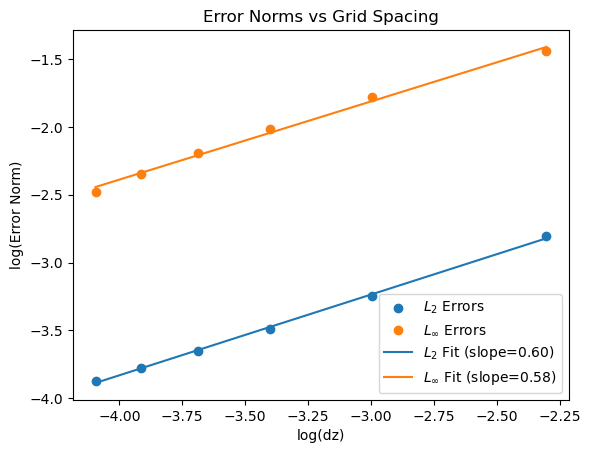

In [168]:
p = np.polyfit(np.log(dz_values), np.log(L2_values), 1)[0]
p_inf = np.polyfit(np.log(dz_values), np.log(L_inf_values), 1)[0]

display(Math(f"Slope \ of \ \ln(L_2): \ {p:.2f}"))
display(Math(f"Slope \ of \ \ln(L_\\infty): \ {p_inf:.2f}"))

plt.scatter(np.log(dz_values), np.log(L2_values), label='$L_2$ Errors')
plt.scatter(np.log(dz_values), np.log(L_inf_values), label='$L_\\infty$ Errors')
plt.plot(np.log(dz_values), np.polyval(np.polyfit(np.log(dz_values), np.log(L2_values), 1), np.log(dz_values)), label=f'$L_2$ Fit (slope={p:.2f})')
plt.plot(np.log(dz_values), np.polyval(np.polyfit(np.log(dz_values), np.log(L_inf_values), 1), np.log(dz_values)), label=f'$L_\\infty$ Fit (slope={p_inf:.2f})')
plt.xlabel('log(dz)')
plt.ylabel('log(Error Norm)')
plt.title('Error Norms vs Grid Spacing')
plt.legend()
plt.show()

We have that $L_2, L_{\infty} \propto \Delta z^p$ where $p$ is the order of the spatial discretization. Hence, by our numerical results we can see that the order of the spatial discretization of the system is of approximately order $0.6$.